## Tutorial 1.3. Introduction to Statistical Quantities in Wind Engineering

### Description: Wind data (measured or simulated) in wind engineering is usually recorded as a time series. Typical quantities measured are velocity (certain components) at a reference height or pressure measured at locations of interest along the structure. Evaluating the statistical quantities of these time series is a crucial task. In this tutorial a time series is generated and analyzed. Various statistical quantities, which are introduced during the lecture, are calculated for a generated signal. Tools for extreme values statistics are also addressed with computations demonstrated for the generated signal. Some additional exercises are proposed for individual studies.

#### The students are adviced to complete the proposed excercises

Project : Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - R. Wuchner, M. Pentek
        
Author : kodakkal.anoop@tum.de, mate.pentek@tum.de

##### Contents:

 1. Generating a time series as a superposition of constant, cosine and random signals 
 2. Introduction of some common statistical tools in python
 3. Interquartile range and box plots
 4. Probability Distribution Function (PDF) 
 5. Fast Fourier Transform (FFT) 
 6. Extreme Value Statistics 
 7. Block Maxima (BM)
 8. Peak Over Threshold (POT)
 9. Generalized Extreme Values (GEV)

In [1]:
# import python modules
import numpy as np
import scipy
from matplotlib import pyplot as plt

# import own modules
import custom_utilities as c_utils

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [2]:
# start time
start_time = 0.0
# end time
end_time = 10.0
# steps 
n_steps = 10000
# time step
delta_time = end_time / (n_steps-1)
# time series
# generate grid size vector (array) 1D
time_series = np.arange(start_time, end_time + delta_time, delta_time)

#### Generating signals in Time Domain

#####  Three signals are created. 
1. A Harmonic (cosine) signal with given amplitude and frequency
2. A constant signal with given amplitude
3. A random signal with specified distribution and given properties

###### 1. Cosine signal with given amplitude and frequency 

In [3]:
# frequency of the cosine
cos_freq = 10
# amplitude of the cosine
cos_ampl = 1
# series of the cosine
cos_series = cos_ampl * np.cos( 2*np.pi* cos_freq * time_series)

###### Let us look at the plot to see how the signal looks like

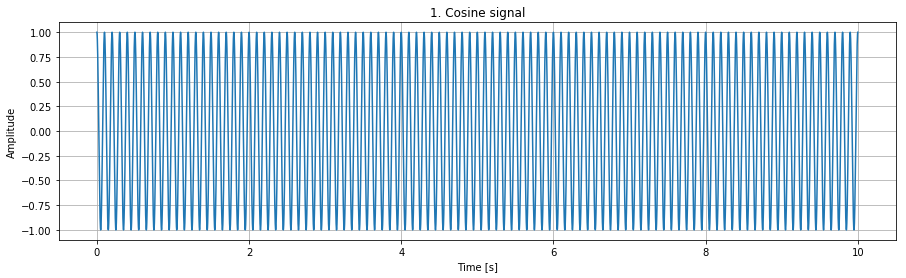

In [4]:
plt.figure(num=1, figsize=(15, 4))
plt.plot(time_series, cos_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('1. Cosine signal')
plt.grid(True)

### Exercise 01 : Try different frequencies 

Try different frequencies for the harmonic function. 
What is the relation between frequency and time period? 
What do you observe in the plots?

###### 2. Constant signal with given amplitude

In [5]:
# amplitude of the constant
const_ampl = 10
# series of the constant
const_series = const_ampl * np.ones(len(time_series))

###### Let us look at the plot to see how the signals look like

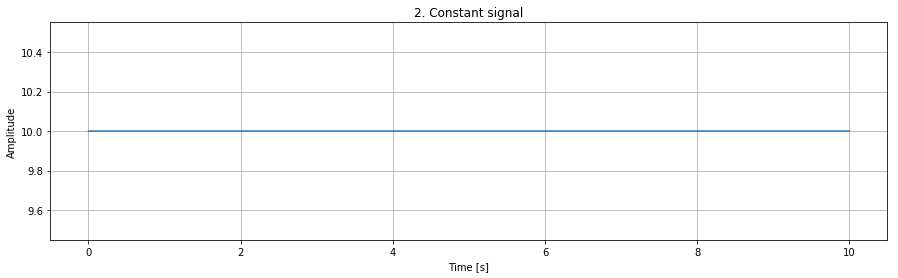

In [6]:
plt.figure(num=2, figsize=(15, 4))
plt.plot(time_series, const_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('2. Constant signal')
plt.grid(True)

###### 3. Random signal with specified distribution and given properties

In [7]:
# random signal 
# assuming nomarl distribution
# with given mean m = 0 and standard deviation std = 0.25
rand_m = 0.0
rand_std = 0.25
# series of the random
rand_series = np.random.normal(rand_m, rand_std, len(time_series))

###### Let us look at the plot to see how the signal looks like

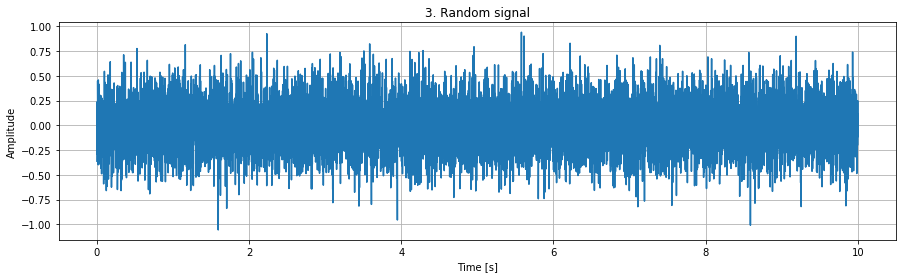

In [8]:
plt.figure(num=3, figsize=(15, 4))
plt.plot(time_series, rand_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('3. Random signal')
plt.grid(True)

### Exercise 02 : Different distributions and parameters for random signal 

Instead of the [normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) distribution for the random signal try [lognormal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html), [beta](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html), [standard normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) and [uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) distribution

In [9]:
#rand_series = np.random.lognormal(0, 0.25, len(time_series))
#rand_series = np.random.beta(1, 0.25, len(time_series))
#rand_series = np.random.rand(len(time_series))
#rand_series = np.random.uniform(0,1,len(time_series))

#### 4. Generic signal - for example a superposition of the above ones


A general signal is represented as a superposition of the above three - constant, cosine and random signals

###### Superposed signal

The above three signals are superposed with corresponding weights

In [10]:
# coefs -> weighting factors for the respective series of signals
coef_signal1 = 1
coef_signal2 = 0.25
coef_signal3 = 1
superposed_series = coef_signal1 * const_series + coef_signal2 * cos_series + coef_signal3 * rand_series

###### Let's look at the plot to see how the signal look like

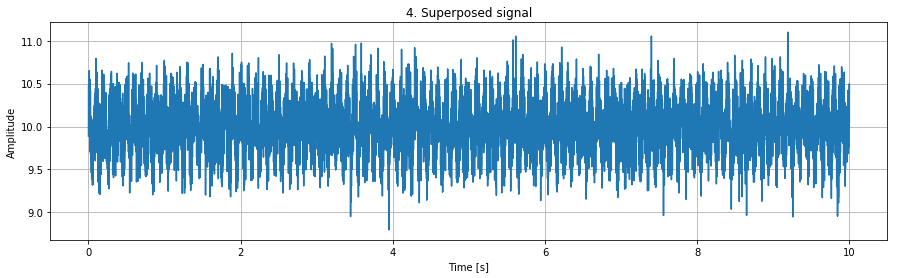

In [11]:
plt.figure(num=4, figsize=(15, 4))
plt.plot(time_series, superposed_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('4. Superposed signal')
plt.grid(True)

### Exercise 03 : Different weights for superposition

Try different weights for the superposition. What do you observe in the plots?

Try different frequencies for the cosine function and observe the difference in the superposed signal. 

## Check Point -  1 : Discussion

#### Discuss among groups the observations and outcomes from exercise 01-03

## 1.1 Statistical tools and quantities used to evaluate the signal

##### The following statistical quantities are computed for the given signal. 
1. Mean (Arithmetic) 
2. Root Mean Square (RMS)
3. Median 
4. Standard deviation
5. Skewness

Recall from the lecture the definitions of these quantities. 
These quantites can be computed using the inbuilt functions of numpy
[mean (arithmetic)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html),
[median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html),
[standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy.std)
and
[skewness](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html)


###### 1. Cosine signal with given amplitude and frequency 

In [12]:
# computing statistical quantitites (scalar values) and "converting" to an array for later plotting
cos_series_m = np.mean(cos_series) * np.ones(len(time_series))
cos_series_std = np.std(cos_series) * np.ones(len(time_series))
cos_series_rms = np.sqrt(np.mean(np.square(cos_series)))  * np.ones(len(time_series))
# printing statistical quantitites (scalar values) to the console
print('Mean: ', np.mean(cos_series))
print('STD: ', np.std(cos_series))
print('RMS: ', np.sqrt(np.mean(np.square(cos_series))))
print('Median: ', np.median(cos_series))
print('Skewness: ',(np.mean(cos_series) - np.median(cos_series))/np.std(cos_series))

Mean:  9.999999999999467e-05
STD:  0.7071421285710532
RMS:  0.7071421356417675
Median:  0.00015709533381615863
Skewness:  -8.074095929136411e-05


###### 2. Constant signal with given amplitude

In [13]:
const_series_m = np.mean(const_series) * np.ones(len(time_series))
const_series_std = np.std(const_series) * np.ones(len(time_series))
const_series_rms = np.sqrt(np.mean(np.square(const_series))) * np.ones(len(time_series))
print('Mean: ', np.mean(const_series))
print('STD: ', np.std(const_series))
print('RMS: ', np.sqrt(np.mean(np.square(const_series))))
print('Median: ', np.median(const_series))
print('Skewness: ', (np.mean(const_series) - np.median(const_series))/np.std(const_series))

Mean:  10.0
STD:  0.0
RMS:  10.0
Median:  10.0
Skewness:  nan


C:\Users\ga39med\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


###### 3. Random signal with specified distribution and given properties

In [14]:
rand_series_m = np.mean(rand_series) * np.ones(len(time_series))
rand_series_std = np.std(rand_series) * np.ones(len(time_series))
rand_series_rms = np.sqrt(np.mean(np.square(rand_series))) * np.ones(len(time_series))
print('Mean: ', np.mean(rand_series))
print('STD: ', np.std(rand_series))
print('RMS: ', np.sqrt(np.mean(np.square(rand_series))))
print('Median: ', np.median(rand_series))
print('Skewness: ', (np.mean(rand_series) - np.median(rand_series))/np.std(rand_series))

Mean:  -0.0006733008672944111
STD:  0.24661249172819089
RMS:  0.24661341084873084
Median:  -0.002763879534933786
Skewness:  0.008477180750209319


#### Superposed signal


In [15]:
superposed_series_m = np.mean(superposed_series) * np.ones(len(time_series))
superposed_series_std = np.std(superposed_series) * np.ones(len(time_series))
superposed_series_rms = np.sqrt(np.mean(np.square(superposed_series))) * np.ones(len(time_series))
print('Mean: ', np.mean(superposed_series))
print('STD: ', np.std(superposed_series))
print('RMS: ', np.sqrt(np.mean(np.square(superposed_series))))
print('Median: ', np.median(superposed_series))
print('Skewness: ', (np.mean(superposed_series) - np.median(superposed_series))/np.std(superposed_series))

Mean:  9.999351699132706
STD:  0.30291063275657054
RMS:  10.00393868705647
Median:  10.001646460831182
Skewness:  -0.007575705341185618


What do the mean, median, mode, RMS, standard deviation and skewness represent?  

### Histogram of the signals

The variation of each signal with time and their histograms are plotted

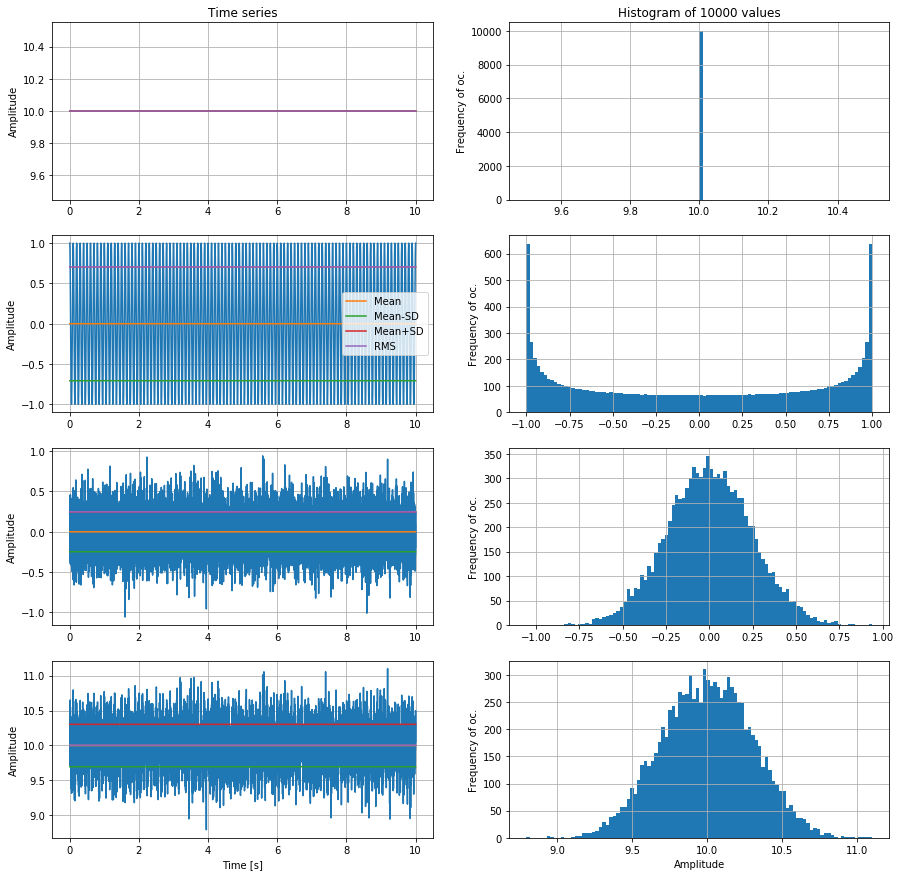

In [16]:
plt.rcParams["figure.figsize"] = (15,15)
plt.figure(num=5)

# const
plt.subplot(4, 2, 1)
plt.plot(time_series, const_series,
         time_series, const_series_m,
         time_series, const_series_m - const_series_std,
         time_series, const_series_m + const_series_std,
         time_series, const_series_rms)
plt.ylabel('Amplitude')
plt.title('Time series')
plt.grid(True)

bins = 100
plt.subplot(4, 2, 2)
plt.hist(const_series, bins)
plt.title('Histogram of ' + str(n_steps) +' values')
plt.ylabel('Frequency of oc.')
plt.grid(True)

# cos
plt.subplot(4, 2, 3)
plt.plot(time_series, cos_series) 
plt.plot(time_series, cos_series_m, label = 'Mean') 
plt.plot(time_series, cos_series_m - cos_series_std, label = 'Mean-SD') 
plt.plot(time_series, cos_series_m + cos_series_std,label = 'Mean+SD') 
plt.plot(time_series, cos_series_rms, label = 'RMS') 
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 4)
plt.hist(cos_series, bins)
plt.ylabel('Frequency of oc.')
plt.grid(True)

# rand
plt.subplot(4, 2, 5)
plt.plot(time_series, rand_series,
         time_series, rand_series_m,
         time_series, rand_series_m - rand_series_std,
         time_series, rand_series_m + rand_series_std,
         time_series, rand_series_rms)
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(4, 2, 6)
plt.hist(rand_series, bins)
plt.ylabel('Frequency of oc.')
plt.grid(True)

# superposed
plt.subplot(4, 2, 7)
plt.plot(time_series, superposed_series,
         time_series, superposed_series_m,
         time_series, superposed_series_m -  superposed_series_std,
         time_series, superposed_series_m +  superposed_series_std,
         time_series, superposed_series_rms)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.grid(True)

plt.subplot(4, 2, 8)
plt.hist(superposed_series, bins)
plt.ylabel('Frequency of oc.')
plt.xlabel('Amplitude')
plt.grid(True)

### Interquartile range and percentile 

The [interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range) , also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion. This is computed as the difference between 75th and 25th percentiles, or between upper and lower quartiles. In statistics of extreme values the interquartile range is also considered along with standard deviation as a measure of the dispersion.
The [Percentile](https://en.wikipedia.org/wiki/Percentile)is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall. These quantites can be computed using the inbuilt functions of numpy
[interquartile range (IQR)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html)
[Percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html)

In [17]:
iqr = scipy.stats.iqr(superposed_series)
q75, q25 = np.percentile(superposed_series, [75 ,25])
print('Interquartile range = ',iqr, 'Interquantile range computed = ', q75-q25)

Interquartile range =  0.4234872291344498 Interquantile range computed =  0.4234872291344498


The [Boxplots](https://en.wikipedia.org/wiki/Box_plot) , can be obtained from the interquartile range to identify possible outliers. The box indicate the middle quartile and the lines extending indicating the variability outside the lower and upper quartiles. The in built python function [boxplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) can be used for plotting

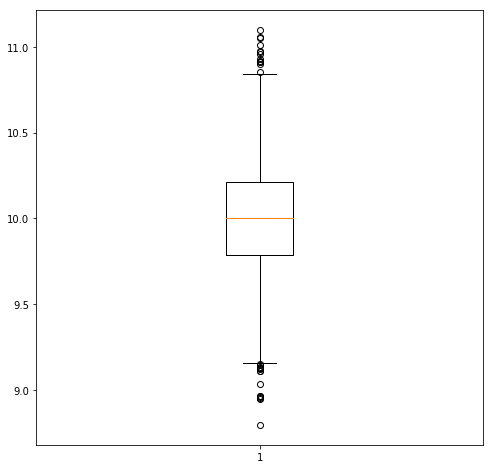

In [18]:
plt.rcParams["figure.figsize"] = (8,8)
plt.figure(num=6)
plt.boxplot(superposed_series)
plt.show()

### Probability Distribution function (PDF) and Cumulative Distribution Function (CDF) 

The PDF and CDF of the signals are derived and are plotted later. Recall from the lecture the definitions of PDF, CDF of a continuous random variables

##### Tip: Have a look at the get_pdf  function in the "custom_utilities.py" for details 

In [19]:
# const
[const_pdf_x, const_pdf_y] = c_utils.get_pdf(const_series,'Normal')

# cos
[cos_pdf_x, cos_pdf_y] = c_utils.get_pdf(cos_series)

# rand
[rand_pdf_x, rand_pdf_y] = c_utils.get_pdf(rand_series)

# superposed
[superposed_pdf_x, superposed_pdf_y] = c_utils.get_pdf(superposed_series)

### Converting to Frequency domain - Fast Fourier Transform  (FFT) 

FFT computes the frequency contents of the given signal. Recall from the lecture the basic definitions and procedure for FFT

##### Tip: Have a look at the CalcForFFT function in the "OwnFunctionDef.py"  for details 

In [20]:
# sampling frequency the same in this case for all time series
sampling_freq = 1/delta_time

# const
[const_freq_half, const_series_fft] = c_utils.get_fft(const_series, sampling_freq)

# cos
[cos_freq_half, cos_series_fft] = c_utils.get_fft(cos_series, sampling_freq)

# rand
[rand_freq_half, rand_series_fft] = c_utils.get_fft(rand_series, sampling_freq)

# superposed
[superposed_freq_half, superposed_series_fft] = c_utils.get_fft(superposed_series, sampling_freq)

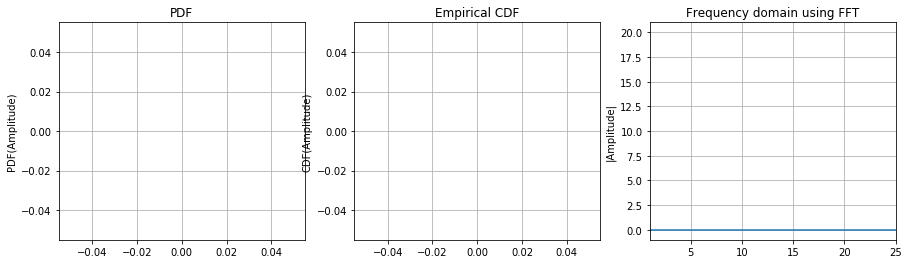

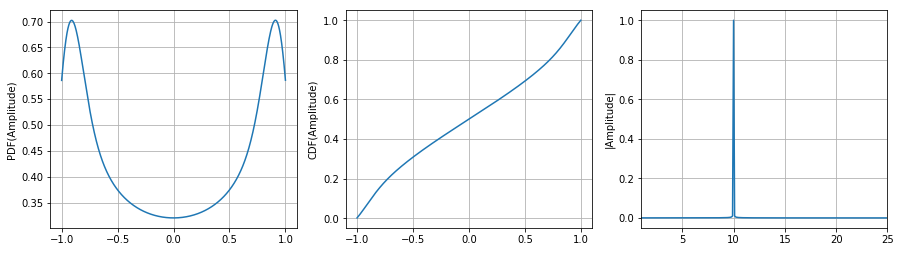

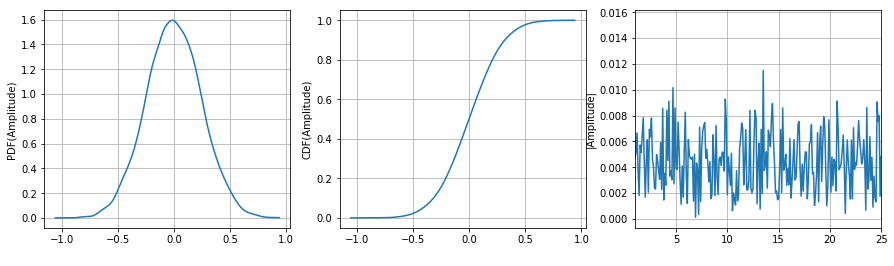

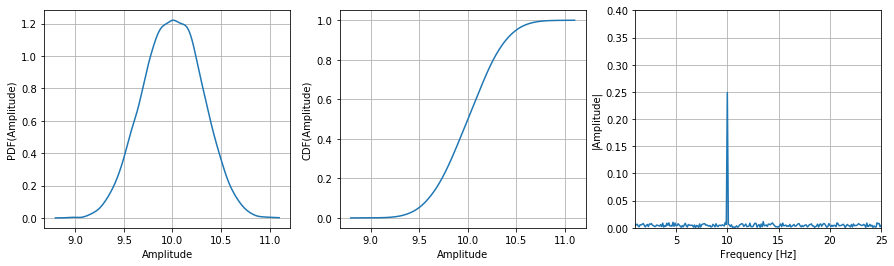

In [21]:
# pdf, cdf and frequency domain
plt.rcParams["figure.figsize"] = (15,4)

# const
plt.figure(num=7)

plt.subplot(1,3,1)
plt.plot(const_pdf_x, const_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.title('PDF')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(const_pdf_x, np.cumsum(const_pdf_y))
plt.ylabel('CDF(Amplitude)')
plt.title('Empirical CDF')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(const_freq_half, const_series_fft)
plt.xlim([1, 25])
plt.ylabel('|Amplitude|')
plt.title('Frequency domain using FFT')
plt.grid(True)
plt.show()

# cos
plt.figure(num=8)

plt.subplot(1,3,1)
plt.plot(cos_pdf_x, cos_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

cos_ecdf = c_utils.get_ecdf(cos_pdf_x, cos_pdf_y)

plt.subplot(1,3,2)
plt.plot(cos_pdf_x, cos_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(cos_freq_half, cos_series_fft)
plt.xlim([1, 25])
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

# rand
plt.figure(num=9)
plt.subplot(1,3,1)
plt.plot(rand_pdf_x, rand_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

rand_ecdf = c_utils.get_ecdf(rand_pdf_x, rand_pdf_y)

plt.subplot(1,3,2)
plt.plot(rand_pdf_x, rand_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(rand_freq_half, rand_series_fft)
plt.xlim([1, 25])
plt.ylabel('|Amplitude|')
plt.grid(True)

plt.show()

# superposed
plt.figure(num=10)
plt.subplot(1,3,1)
plt.plot(superposed_pdf_x, superposed_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

superposed_ecdf = c_utils.get_ecdf(superposed_pdf_x, superposed_pdf_y)

plt.subplot(1,3,2)
plt.plot(superposed_pdf_x, superposed_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(superposed_freq_half, superposed_series_fft)
plt.ylim([0, 0.4])
plt.xlim([1, 25])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|Amplitude|')
plt.grid(True)

plt.show()

PDF follows the normalized hystograms. Observe the predominant frequency in the superimposed signal. 

### Excercise 04 : Try two or more harmonic function

Try two or more cosine functions and superimpose them. What difference do you observe ?
What do you observe in the FFT plots? 

## Check Point -  2 : Discussion

#### Discuss among groups the uses of various statistical quantities and their significance

## 1.2 Extreme value statistics

####  The two methods for extreme value analysis of the structure are Block Maxima(BM) and Peak over threshold (POT) are presented . Recall from the lecture the basic definitions and differences between these two parameters. 

The extreme value statistics of the generated superimposed signal generated earlier will be computed in this section. 

In [22]:
# here give the value for given_series
# as you have 4 series at hand already generated, you could
# choose one of const_series, cos_series, random_series, superposed_series
given_series = rand_series

### Block Maxima (BM)

Recall from the lecture the basics of block maxima. A window size is chosen in computation of BM. The signal will be divided into the given window size. the extrema is extracted at each of the window. The mean,sd and other statistics will be computed for the extremas.

In [23]:
block_size = np.round(len(given_series)/20) #  /20 -> 5% parent size for around
# 0.2% from parent distribution to be in tails 
[bm_index, bm_extreme_values] = c_utils.get_bm(given_series, block_size)
[bm_pdf_x, bm_pdf_y] = c_utils.get_pdf(bm_extreme_values)

##### Tip: Have a look at the ExtractBM function in the "OwnFunctionDef.py"  for details 

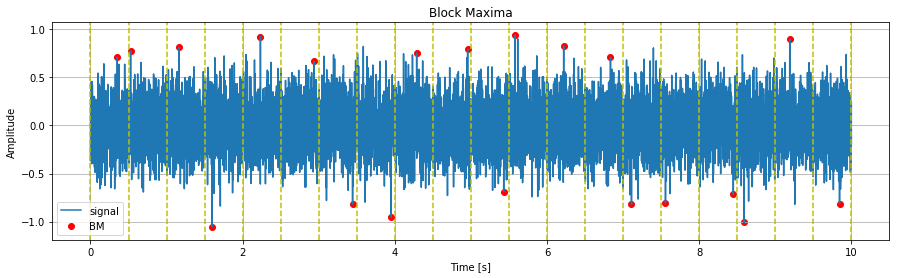

In [24]:
# plotting the initial time series and selected signal series - as a line plot
plt.figure(num=11)
plt.plot(time_series, given_series, label  ='signal')

# plotting the extracted bm - as a scatter plot with round red markers
plt.scatter(time_series[bm_index], given_series[bm_index], marker = 'o', color = 'r', label='BM')
plt.ylabel('Amplitude')
plt.title('Block Maxima')
plt.xlabel('Time [s]')

# add a verticle yellow dashed line to mark the separation between blocks used for extraction
for idx in np.arange(len(bm_index)):
    plt.axvline(x=time_series[np.int(block_size * idx)], color='y', linestyle='--')
plt.axvline(x=time_series[-1], color='y', linestyle='--')

plt.legend()
plt.grid(True)

__Note:__ Deciding the block size  in computation of BM can be critical. If the size of blocks is too big (resulting in very few blocks - too few extracted maxima), it may lead to large variance. If the block size is too small (resulting in too many blocks - too many extracted maxima) this may lead to large bias. The block size is decided as a trade off between the bias and the variance.   

### The Generalized Extreme Value distribution (GEV) 

The generalized extreme value (GEV) distribution function is a best fit to block maxima of data. Recall the details of the [extreme value distributions (GEV)](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution). The scipy implementation of [GEV](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html) can be used


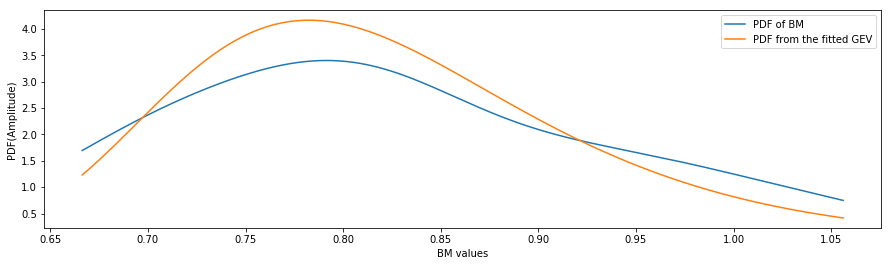

In [25]:
# importing additional necessary modules
from scipy.stats import genextreme as gev

# getting the fitting parameters shape, location and scale for the bm_extreme_values based upon a certain GEV fitting
bm_shape, bm_loc, bm_scale = gev.fit(bm_extreme_values)

bm_pdf_x2 = np.linspace(np.min(bm_extreme_values), np.max(bm_extreme_values), 100)
bm_pdf_y2 = gev.pdf(bm_pdf_x2, bm_shape, bm_loc, bm_scale)

plt.figure(num=12)
plt.rcParams["figure.figsize"] = (10,6)

# PDF calculated using the get_pdf from custom_function_utilities
plt.plot(bm_pdf_x, bm_pdf_y, label = 'PDF of BM')
# PDF generated as a fitted curve using generalized extreme distribution
plt.plot(bm_pdf_x2, bm_pdf_y2, label = 'PDF from the fitted GEV')

plt.xlabel('BM values')
plt.ylabel('PDF(Amplitude)')
plt.legend()
plt.show()

__Note:__ What do the parameters of GEV distribution indicate? How to classify the given extreme to be Gumbel (type I GEV), Frêchet (type II GEV) or Weibull (type III) distribution based on these parameters? Discuss

### Peak Over Threshold (POT)

Recall from the lecture the basics of peak over threshold. Every value exceeding this predefined threshold is considered an extrema. The threshold has to be decided in the beginning of the analysis, its choice is usually a function of the mean and the standard deviation of the signal.

In [26]:
series_m = np.mean(given_series)
series_std = np.std(given_series)

threshold_param = 2.5
threshold_value = series_m + threshold_param * series_std # for around 0.25% from parent 

# distribution to be in tails
# here end_time means values extracted after the whole given_series is available
[pot_endtime_index, pot_endtime_extreme_values] = c_utils.get_pot(given_series, threshold_value)
[pot_endtime_pdf_x, pot_endtime_pdf_y] = c_utils.get_pdf(pot_endtime_extreme_values)

print("POT: Threshold value: ", threshold_value)

POT: Threshold value:  0.6158579284531828


Here, the threshold is set as mean plus 3 times standard deviation. For a normal distributed random variable this interval  $\mu \pm \sigma$ is found to have 99.75% density inside. 

##### Tip: Have a look at the get_pot function in the "custom_utilities.py"  for details 

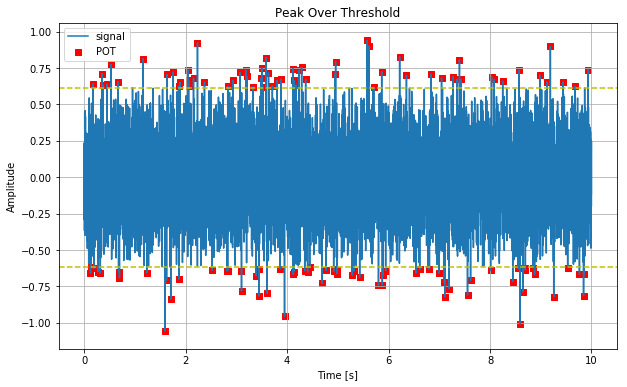

In [27]:
plt.figure(num=13)
# plotting the initial time series and selected signal series - as a line plot
# for this case the whole series is available
# it represents a signal being made available at the end of a mearsuremen or simulation
plt.plot(time_series, given_series, label = 'signal')

# plotting the extracted pot - as a scatter plot with round red markers
plt.scatter(time_series[pot_endtime_index], given_series[pot_endtime_index], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold')

# add a horizontal yellow dashed line to mark the the two trehsholds (upper and lower) used for extraction
plt.axhline(y=threshold_value, color='y', linestyle='--')
plt.axhline(y=-threshold_value, color='y', linestyle='--')

plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

### Runtime evaluation of POT

In many situations the whole data is not available in the begining of the analysis. The POT need to be evaluated on the fly. 

The mean and standard deviation used for defining the threshold criteria are also updated as new data becomes available. Here, the runtime behavior is replicated by considering the new values as soon as these become available.    

##### Tip: Have a look at the get_pot_runtime function in the "custom_utilities.py"  for details 

In [28]:
[res_m, res_rms, res_std, res_med, res_skew,
 res_thres, pot_runtime_index, pot_runtime_extreme_values] = \
                                c_utils.get_pot_runtime(given_series, threshold_param)
[pot_runtime_pdf_x, pot_runtime_pdf_y] = c_utils.get_pdf(pot_runtime_extreme_values)

C:\Users\ga39med\LRZ Sync+Share\StructWindEng_WS18_19\Raw\GitLab\JupyterNotebookFortutorials\Ex_01_Statistics\custom_utilities.py:194: RuntimeWarning: divide by zero encountered in double_scalars
  standarddev = np.sqrt((part1 - 2* meannew * part2 + meannew*meannew* i)/(i-1))
C:\Users\ga39med\LRZ Sync+Share\StructWindEng_WS18_19\Raw\GitLab\JupyterNotebookFortutorials\Ex_01_Statistics\custom_utilities.py:194: RuntimeWarning: invalid value encountered in sqrt
  standarddev = np.sqrt((part1 - 2* meannew * part2 + meannew*meannew* i)/(i-1))


Elapsed time for get_pot_runtime function evaluation:  9.181690968129544 s



##### Let's plot the run-time statistical quantities and look how they evolve with time

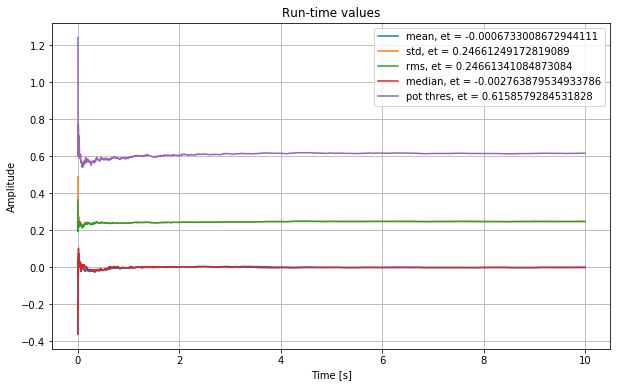

In [29]:
plt.figure(num=14)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(time_series, res_m,
         time_series, res_std,
         time_series, res_rms,
         time_series, res_med,
         time_series, res_thres)
plt.legend(['mean, et = '+ str(np.mean(given_series)),
            'std, et = ' + str(np.std(given_series)),
            'rms, et = ' + str(np.sqrt(np.mean(np.square(given_series)))),
            'median, et = '+ str(np.median(given_series)),
            'pot thres, et = '+ str(threshold_value)])
plt.ylabel('Amplitude')
plt.title('Run-time values')
plt.xlabel('Time [s]')
plt.grid(True)

##### Let's plot the run-time evaluation of POT

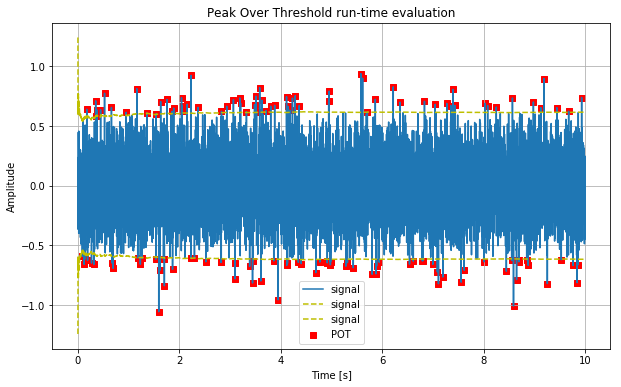

In [30]:
plt.figure(num=15)
plt.rcParams["figure.figsize"] = (15,4)
# plotting the initial time series and selected signal series - as a line plot
# for this case the whole series is not available, but it is being made available one time step at a time
# it represents a signal being made available in run-time
plt.plot(time_series, given_series, label = 'signal')

# plotting the extracted pot - as a scatter plot with round red markers
plt.scatter(time_series[pot_runtime_index], given_series[pot_runtime_index], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold run-time evaluation')

# add a horizontal yellow dashed line to mark the the two trehsholds (upper and lower) used for extraction
# note that these are not totally straight lines from the beginning until the end, but vary slightly in time
plt.plot(time_series, res_m + threshold_param * res_std, label = 'signal', color='y', linestyle='--')
plt.plot(time_series, -res_m - threshold_param * res_std, label = 'signal', color='y', linestyle='--')

plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

### The Generalized Pareto distribution (GP) 

The generalized Pareto (GP) distribution function is a best fit to peak over threshold data. Recall the details of the [generalized Pareto (GP) distribution](https://en.wikipedia.org/wiki/Generalized_Pareto_distribution). The scipy implementation of [GP](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genpareto.html) can be used


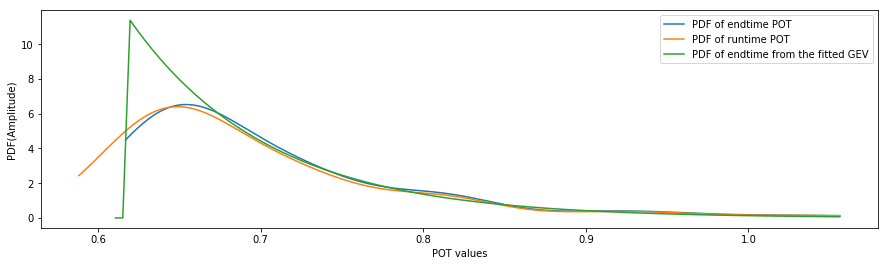

In [31]:
# importing additional necessary modules
from scipy.stats import genpareto as gp

# getting the fitting parameters shape, location and scale for the bm_extreme_values based upon a certain GEV fitting
pot_shape, pot_loc, pot_scale = gp.fit(pot_endtime_extreme_values, 0 , loc = threshold_value , scale = 1)

pot_endtime_pdf_x2 = np.linspace(0.99 * np.min(pot_endtime_extreme_values), np.max(pot_endtime_extreme_values), 100)
pot_endtime_pdf_y2 = gp.pdf(pot_endtime_pdf_x2, pot_shape, pot_loc, pot_scale)

plt.figure(num=16)
plt.rcParams["figure.figsize"] = (10,6)

# PDF calculated using the get_pdf from custom_function_utilities
# for endtime and runtime
plt.plot(pot_endtime_pdf_x, pot_endtime_pdf_y, label = 'PDF of endtime POT')
plt.plot(pot_runtime_pdf_x, pot_runtime_pdf_y, label = 'PDF of runtime POT')

# PDF generated as a fitted curve using generalized extreme distribution
plt.plot(pot_endtime_pdf_x2, pot_endtime_pdf_y2, label = 'PDF of endtime from the fitted GEV')

plt.xlabel('POT values')
plt.ylabel('PDF(Amplitude)')
plt.legend()
plt.show()

### Excercise 05: Observe the changes with varying the number of blocks and threshold value

Change __'blockSize'__ and __'thresholdParam'__. Observe the differnce,  comment and discuss 

## Check Point -  3 : Discussion

#### Discuss among groups the observations and outcomes regarding extreme value statistics

### Assignment : Compute the extreme value statistics for the given signal

Two data sets 'given_data1.dat' and 'given_data2.dat' are provided which contains the time domain data of bending moment. Compute the statistical quantities of the given data. Plot the corresponding functions. Compute the BM and POT for these given data sets.

In [32]:
# file_name = 'given_data1.dat'  # has 5350 values for each column
# time_series = np.loadtxt(file_name, skiprows=0, usecols = (0,)) # in [s]
# bending_moment_series = np.loadtxt(file_name, skiprows=0, usecols = (1,)) # in [kNm]

# file_name = 'given_data2.dat' # has 53491 values for each column
# time_series = (np.loadtxt(file_name, skiprows=0, usecols = (0,))-1000)/100  # shift 1000 [cs] then divide by 100 to get [s]
# bending_moment_series = np.loadtxt(file_name, skiprows=0, usecols = (1,))/1000 # to get [kNm] from [Nm] divide by 1000

__TODO__ add the refernce of extreme value textbook
